In [1]:
import numpy as np
import matplotlib.pyplot as plt
def factorial(n):
    return np.prod(range(1,n+1))

In [2]:
#1.)
#Person is infected : I
#Person is not infected: nI
#Test is positive: S
#Test is negative: nS

#True Positive: P(S|I) = 0.6
#True Negative: P(nS|nI) = 0.99
#False positive/Type I error: P(S|nI) = 0.01
#False negative/Type II error: P(nS|I) = 0.4

#What is the probability to be healthy, given a negative test.
#We look for P(nI|nS)
#Bayes Theorem: P(nI|nS)P(nS) = P(nS|nI)P(nI)
#So: P(nI|nS) = P(nS|nI)P(nI)/P(nS) = P(nS|nI)/(P(nS|nI)P(nI)+P(nS|I)P(I)) * P(nI) = (0.99(1-P(I))/(0.99-0.59 P(I))))
#Using the frequencist definition of probability: P(I) = The prevalence in the general population.
#So:

Text(0, 0.5, 'Probability')

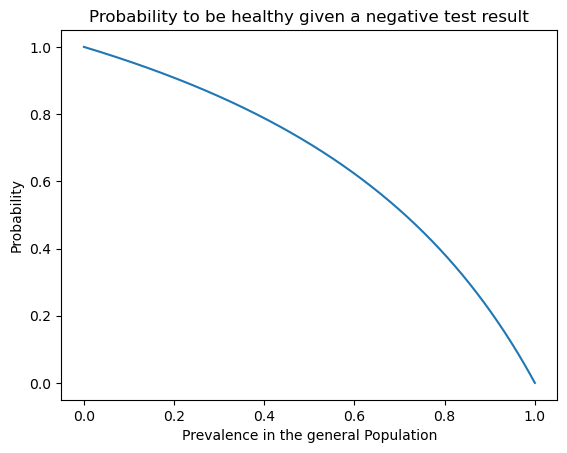

In [3]:
#Probability to be healthy given a negative test result
#x = np.linspace(10**(-6),1,1000)
x = np.linspace(10**(-6),1,1000)
y = ((0.99*(1-x)))/((0.99-0.59*x))
plt.plot(x,y)
plt.title("Probability to be healthy given a negative test result")
plt.xlabel("Prevalence in the general Population")
plt.ylabel("Probability")



In [4]:
#2.) a)
def pois_prob(mean,n):
    p = ((mean**n)/(factorial(n)))*np.exp(-mean)
    return p
prob = 1
for n in range(5):
    prob -= pois_prob(1.8,n)
print(1-prob)
print("3 sigma represents an intervall of 0.9973, meaning that the result is not \"significant\"")

0.9635933389989166
3 sigma represents an intervall of 0.9973, meaning that the result is not "significant"


In [37]:
#b.)
def pois_prob_2(mean1,mean2,n):
    mean = mean1+mean2
    p = ((mean**n)/(factorial(n)))*np.exp(-mean)
    return p
def pois_sum(mean1,mean2,n):
    prob_sum = 0
    for i in range(n+1):
        prob_sum += pois_prob_2(mean1,mean2,n)
    return prob_sum

mean1 = 1.8
n = 5
l_min = 0
l_max = 20
p_min = 0
p_max = 1
end_l = 0
counter = 0

while np.abs(p_max-p_min) >= 10**(-5):  
    p_min = pois_sum(mean1,l_min,n)
    p_max = pois_sum(mean1,l_max,n)
    if np.abs(p_max-p_min) < 10**(-5):
        end_l = (l_max+l_min)/2 - 1.8
        print(end_l)
        break
    else:
        if pois_sum(mean1,(l_min + (l_max-l_min)*0.5) ,n) > 0.05:
            l_min = l_min + np.abs(l_max-l_min)*0.5
        else:
            l_max = l_min + np.abs(l_max-l_min)*0.5
    
    Counter +=1
    if counter>= 10**6:
        print("Exeeded runtime")
        break


9.113238525390624


In [38]:
N_runs = 10**5
Counter = 0
for i in range(N_runs):
    rand = np.random.poisson(mean1+end_l,1)
    if rand <= n:
        Counter += 1
print(Counter/N_runs)

0.03947
